<a href="https://colab.research.google.com/github/denis3079/Machine-Learning/blob/master/Kohonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.5464588074605503e-07
 topographic error: 0.18563922942206654

...ready!


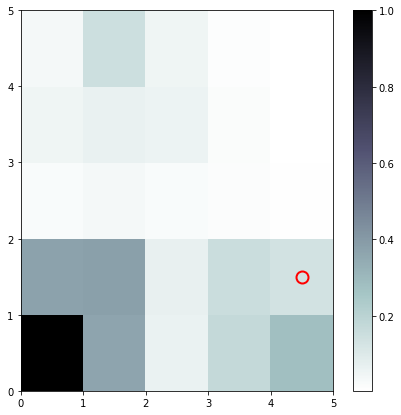

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
# чтение набора данных в формате csv
data = np.genfromtxt('/content/drive/My Drive/Kohonen (1).csv', delimiter=',', usecols=(1, 2, 3, 4))
# нормализация до единства каждого паттерна в данных
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
# Инициализация и обучение
som = MiniSom(5, 5, 4, sigma=2, learning_rate=0.5,neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 1000, verbose=True)  # обучение с 1000-ю итерациями
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Построение ответа для каждого шаблона в наборе данных
plt.pcolor(som.distance_map().T, cmap='bone_r')  # построение карты расстояний
plt.colorbar()
target = np.genfromtxt('/content/drive/My Drive/Kohonen (1).csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Speed'] = 1
t[target == 'ForwardAcceleration'] = 2
t[target == 'BackwardAcceleration'] = 3
t[target == 'LeftAcceleration'] = 4
markers = ['o', 'v', '1', '3'] # использование разных цветов и маркеров для каждой этикетки
colors = ["r", "g", "b", "y"]
for cnt, xx in enumerate(data): w = som.winner(xx)  # получение победителя
    # разместим маркер на выигрышной позиции для образца хх
plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None', markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 5, 0, 5])
#plt.savefig('resulting_images/som_iris.png')
plt.show()

Инициализация SOM.

 Завершена.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipyker

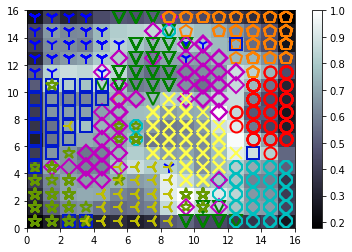

In [106]:
import numpy as np
from sklearn.datasets import load_digits


digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target


from minisom import MiniSom

som = MiniSom(16,16,64,sigma=1.3,learning_rate=0.5)
som.random_weights_init(data)
print("Инициализация SOM.")
som.train_random(data,10000) 
print("\n Завершена.")

from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) 
colorbar()

labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
 w = som.winner(xx) 
 plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markerfacecolor='None',
   markeredgecolor=colors[labels[cnt]],markersize=12,markeredgewidth=2)
axis()
show()